# Exploring Backpropagation and Learning Heuristics in Deep MLPs

## Base Model (A nueral network with 3 hidden layer without any additional heuristics)

### Importing tensorflow & matplot

In [1]:
import tensorflow as tf
from tensorflow import keras

from matplotlib import pyplot as plt
%matplotlib inline

### Setting the parameters

In [2]:
EPOCHS = 50
BATCH_SIZE = 64
VERBOSE= 1
NB_CLASSES= 10
N_HIDDEN= 128
VALIDATION_SPLIT= 0.2  #How much of TRAIN in reserved for VALIDATION

### Loading the data

In [3]:
mnist = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### Visualization of Data

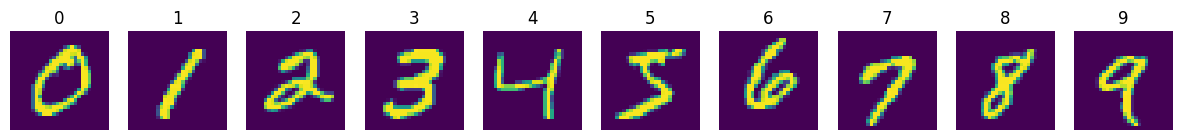

In [4]:
f, ax = plt.subplots(1, NB_CLASSES, figsize=(15, 150))

for i in range(NB_CLASSES):
  sample = X_train[y_train == i][0]
  # print(sample.shape)
  ax[i].imshow(sample)
  ax[i].set_title(i)
  ax[i].axis("off")

### Essential Normlizarino (Converting the matrix to an array + One hot encoding)

In [5]:
RESHAPED = 28*28
X_train = X_train.reshape(60000, RESHAPED).astype("float32")
X_test = X_test.reshape(10000, RESHAPED).astype("float32")

# Normalizing the input between 0 and 1
X_train /= 255.0
X_test /= 255.0

In [6]:
y_train = keras.utils.to_categorical(y_train, NB_CLASSES)
y_test = keras.utils.to_categorical(y_test, NB_CLASSES)

### Building the model

In [7]:
base_model = tf.keras.models.Sequential()

base_model.add(keras.layers.Dense(N_HIDDEN, input_shape=(RESHAPED, ), activation="relu", name="Dense_Layer_1"))
base_model.add(keras.layers.Dense(N_HIDDEN, activation="relu", name="Dense_Layer_2"))
base_model.add(keras.layers.Dense(N_HIDDEN, activation="relu", name="Dense_Layer_3"))
base_model.add(keras.layers.Dense(NB_CLASSES, activation="softmax", name="Output_Layer"))

base_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Dense_Layer_1 (Dense)                │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_Layer_2 (Dense)                │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_Layer_3 (Dense)                │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output_Layer (Dense)                 │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 134,794 (526.54 KB)

 Trainable params: 134,794 (526.54 KB)

 Non-trainable params: 0 (0.00 B)

### Compiling the model

In [8]:
base_model.compile(optimizer="SGD", loss="categorical_crossentropy", metrics=["accuracy"])

### Training the model

In [9]:
base_model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Epoch 1/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4939 - loss: 1.7238 - val_accuracy: 0.8811 - val_loss: 0.4545
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8802 - loss: 0.4320 - val_accuracy: 0.9091 - val_loss: 0.3186
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9044 - loss: 0.3290 - val_accuracy: 0.9226 - val_loss: 0.2687
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9184 - loss: 0.2844 - val_accuracy: 0.9303 - val_loss: 0.2411
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9265 - loss: 0.2553 - val_accuracy: 0.9358 - val_loss: 0.2222
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9319 - loss: 0.2261 - val_accuracy: 0.9417 - val_loss: 0.2050
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9405 - loss: 0.2040 - val_accuracy: 0.9467 - val_loss: 0.1902
Epoch 8/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9436 - loss: 0.1923 - val_accuracy: 0.

### Evaluating the model

In [10]:
test_loss, test_accuracy = base_model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9717 - loss: 0.0939
Test Loss: 0.08086122572422028
Test Accuracy: 0.9753999710083008


As you can see we have a higher accuracy in training than test accuracy (or even validation!)

What's the meaning?

OVERFITTING!!!

Yes, our model is now overfitted. now we will use different method to address this problem.

## Regularization

### L2 regularization

L2 regularization, also known as Ridge Regularization, helps prevent overfitting by discouraging the model from relying too heavily on any single feature.

During training, the model is encouraged to keep the weights small to reduce overfitting.

The L2 regularization in tensorflow takes a parameter calle penalty strength (also regularization factor) wich determines the strength of the regularization.

### Importing L2 regularization

In [11]:
from tensorflow.keras.regularizers import l2

### Building the model

In [16]:
L2_REG_FAC = .005

model_with_l2 = tf.keras.models.Sequential()

model_with_l2.add(keras.layers.Dense(N_HIDDEN, input_shape=(RESHAPED, ), activation="relu", kernel_regularizer=l2(L2_REG_FAC), name="Dense_Layer_1"))
model_with_l2.add(keras.layers.Dense(N_HIDDEN, activation="relu", kernel_regularizer=l2(L2_REG_FAC), name="Dense_Layer_2"))
model_with_l2.add(keras.layers.Dense(N_HIDDEN, activation="relu", kernel_regularizer=l2(L2_REG_FAC), name="Dense_Layer_3"))
model_with_l2.add(keras.layers.Dense(NB_CLASSES, activation="softmax", kernel_regularizer=l2(L2_REG_FAC), name="Output_Layer"))

model_with_l2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Dense_Layer_1 (Dense)                │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_Layer_2 (Dense)                │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_Layer_3 (Dense)                │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output_Layer (Dense)                 │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 134,794 (526.54 KB)

 Trainable params: 134,794 (526.54 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model_with_l2.compile(optimizer="SGD", loss="categorical_crossentropy", metrics=["accuracy"])

In [18]:
model_with_l2.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Epoch 1/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5370 - loss: 4.0345 - val_accuracy: 0.8819 - val_loss: 2.6898
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8784 - loss: 2.6167 - val_accuracy: 0.9047 - val_loss: 2.3325
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8990 - loss: 2.2852 - val_accuracy: 0.9145 - val_loss: 2.0687
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9090 - loss: 2.0272 - val_accuracy: 0.9201 - val_loss: 1.8503
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9161 - loss: 1.8119 - val_accuracy: 0.9237 - val_loss: 1.6651
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9202 - loss: 1.6319 - val_accuracy: 0.9268 - val_loss: 1.5066
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9240 - loss: 1.4849 - val_accuracy: 0.9289 - val_loss: 1.3758
Epoch 8/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9275 - loss: 1.3500 - val_accuracy: 0.

### Evaluating the model

In [19]:
test_loss, test_accuracy = model_with_l2.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9467 - loss: 0.5414
Test Loss: 0.5152761340141296
Test Accuracy: 0.9546999931335449


We can see that the training accuracy decreased around 95% (validation accuracy is around 95%) and the test accuracy is also around 95%!

This means that the L2 regularization prevented the model from overfitting.

### Dropout

__Dropout__ is a regularization technique used in deep learning to prevent overfitting. It works by randomly “dropping out” (setting to zero) a fraction of neurons during training, effectively creating a thinner, temporary version of the neural network. This forces the model to learn more robust and generalized features rather than relying too heavily on specific neurons.

### Building the model

In [23]:
L2_REG_FAC = .005
DROPOUT_RATE = .2

model_with_l2_and_dropout = tf.keras.models.Sequential()

model_with_l2_and_dropout.add(keras.layers.Dense(N_HIDDEN, input_shape=(RESHAPED, ), activation="relu", kernel_regularizer=l2(L2_REG_FAC), name="Dense_Layer_1"))
model_with_l2_and_dropout.add(keras.layers.Dropout(DROPOUT_RATE))

model_with_l2_and_dropout.add(keras.layers.Dense(N_HIDDEN, activation="relu", kernel_regularizer=l2(L2_REG_FAC), name="Dense_Layer_2"))
model_with_l2_and_dropout.add(keras.layers.Dropout(DROPOUT_RATE))

model_with_l2_and_dropout.add(keras.layers.Dense(N_HIDDEN, activation="relu", kernel_regularizer=l2(L2_REG_FAC), name="Dense_Layer_3"))
model_with_l2_and_dropout.add(keras.layers.Dropout(DROPOUT_RATE))

model_with_l2_and_dropout.add(keras.layers.Dense(NB_CLASSES, activation="softmax", kernel_regularizer=l2(L2_REG_FAC), name="Output_Layer"))

model_with_l2_and_dropout.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Dense_Layer_1 (Dense)                │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_Layer_2 (Dense)                │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_Layer_3 (Dense)                │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output_Layer (Dense)                 │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 134,794 (526.54 KB)

 Trainable params: 134,794 (526.54 KB)

 Non-trainable params: 0 (0.00 B)

### Compiling the model

In [24]:
model_with_l2_and_dropout.compile(optimizer="SGD", loss="categorical_crossentropy", metrics=["accuracy"])

### Training the model


In [25]:
model_with_l2_and_dropout.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Epoch 1/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3523 - loss: 4.3294 - val_accuracy: 0.8508 - val_loss: 2.8063
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7674 - loss: 2.8968 - val_accuracy: 0.8922 - val_loss: 2.3591
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8304 - loss: 2.4594 - val_accuracy: 0.9033 - val_loss: 2.0792
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8567 - loss: 2.1655 - val_accuracy: 0.9133 - val_loss: 1.8505
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8693 - loss: 1.9419 - val_accuracy: 0.9185 - val_loss: 1.6626
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8828 - loss: 1.7481 - val_accuracy: 0.9222 - val_loss: 1.5032
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8900 - loss: 1.5849 - val_accuracy: 0.9253 - val_loss: 1.3656
Epoch 8/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8955 - loss: 1.4412 - val_accuracy: 0.

### Evaluating the moedel

In [26]:
test_loss, test_accuracy = model_with_l2_and_dropout.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9480 - loss: 0.5475
Test Loss: 0.520433783531189
Test Accuracy: 0.9570000171661377


Now that we used both regularization (L2 and Dropout) the accuracy of the model decreased to 94% (accuracy of the validatino set 95%) and the test acccuracy is now 96%. This also mean that the model is not overfit.

## Optimization Algorithms

Optimization algorithms in deep learning are techniques used to minimize the loss function by updating the weights of the model during training.

1. __Stochastic Gradient Descent (SGD):__ Updates weights by moving in the direction of the negative gradient of the loss function with respect to the weights.

2. __Adam (Adaptive Moment Estimation):__ Combines the advantages of Momentum and RMSprop by using adaptive learning rates and keeping track of both first and second moments of the gradients.

3. __RMSprop (Root Mean Square Propagation):__ Adjusts the learning rate for each parameter individually, scaling it inversely proportional to the square root of the recent average of gradients.

Each optimizer has its strengths and weaknesses, and the choice often depends on the problem, model architecture, and dataset.

### Building the model

In [27]:
L2_REG_FAC = .005
DROPOUT_RATE = .4

model = tf.keras.models.Sequential()

model.add(keras.layers.Dense(N_HIDDEN, input_shape=(RESHAPED, ), activation="relu", kernel_regularizer=l2(L2_REG_FAC), name="Dense_Layer_1"))
model.add(keras.layers.Dropout(DROPOUT_RATE, name="Dropout_Layer_1"))

model.add(keras.layers.Dense(N_HIDDEN, activation="relu", kernel_regularizer=l2(L2_REG_FAC), name="Dense_Layer_2"))
model.add(keras.layers.Dropout(DROPOUT_RATE, name="Dropout_Layer_2"))

model.add(keras.layers.Dense(N_HIDDEN, activation="relu", kernel_regularizer=l2(L2_REG_FAC), name="Dense_Layer_3"))
model.add(keras.layers.Dropout(DROPOUT_RATE, name="Dropout_Layer_3"))

model.add(keras.layers.Dense(NB_CLASSES, activation="softmax", kernel_regularizer=l2(L2_REG_FAC), name="Output_Layer"))

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Dense_Layer_1 (Dense)                │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dropout_Layer_1 (Dropout)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_Layer_2 (Dense)                │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dropout_Layer_2 (Dropout)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_Layer_3 (Dense)                │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dropout_Layer_3 (Dropout)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output_Layer (Dense)                 │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 134,794 (526.54 KB)

 Trainable params: 134,794 (526.54 KB)

 Non-trainable params: 0 (0.00 B)

### Compiling the model with different optimaizers (SGD, adam, RMSProp)

(We already saw the model with "SGD")

## adam

In [28]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

### Training the model

In [29]:
model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Epoch 1/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6525 - loss: 2.2443 - val_accuracy: 0.9277 - val_loss: 0.7300
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8896 - loss: 0.8374 - val_accuracy: 0.9383 - val_loss: 0.6415
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8989 - loss: 0.7691 - val_accuracy: 0.9373 - val_loss: 0.6194
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9029 - loss: 0.7504 - val_accuracy: 0.9433 - val_loss: 0.6080
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9076 - loss: 0.7325 - val_accuracy: 0.9429 - val_loss: 0.5998
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9075 - loss: 0.7333 - val_accuracy: 0.9452 - val_loss: 0.5954
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9065 - loss: 0.7305 - val_accuracy: 0.9393 - val_loss: 0.6058
Epoch 8/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9105 - loss: 0.7193 - val_accuracy: 0.

### Evaluating the model

In [30]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9325 - loss: 0.6177
Test Loss: 0.5879926681518555
Test Accuracy: 0.942300021648407


As it shown, the model accuracy won't increase from a certain point, so I reduice the number of epochs to 20.

In [31]:
EPOCHS= 20

## RMSProp

### Building the model

In [32]:
L2_REG_FAC = .005
DROPOUT_RATE = .4

model = tf.keras.models.Sequential()

model.add(keras.layers.Dense(N_HIDDEN, input_shape=(RESHAPED, ), activation="relu", kernel_regularizer=l2(L2_REG_FAC), name="Dense_Layer_1"))
model.add(keras.layers.Dropout(DROPOUT_RATE, name="Dropout_Layer_1"))

model.add(keras.layers.Dense(N_HIDDEN, activation="relu", kernel_regularizer=l2(L2_REG_FAC), name="Dense_Layer_2"))
model.add(keras.layers.Dropout(DROPOUT_RATE, name="Dropout_Layer_2"))

model.add(keras.layers.Dense(N_HIDDEN, activation="relu", kernel_regularizer=l2(L2_REG_FAC), name="Dense_Layer_3"))
model.add(keras.layers.Dropout(DROPOUT_RATE, name="Dropout_Layer_3"))

model.add(keras.layers.Dense(NB_CLASSES, activation="softmax", kernel_regularizer=l2(L2_REG_FAC), name="Output_Layer"))

model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Dense_Layer_1 (Dense)                │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dropout_Layer_1 (Dropout)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_Layer_2 (Dense)                │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dropout_Layer_2 (Dropout)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_Layer_3 (Dense)                │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dropout_Layer_3 (Dropout)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output_Layer (Dense)                 │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 134,794 (526.54 KB)

 Trainable params: 134,794 (526.54 KB)

 Non-trainable params: 0 (0.00 B)

### Compiling the model

In [33]:
model.compile(optimizer="RMSprop", loss="categorical_crossentropy", metrics=["accuracy"])

### Training the model

In [34]:
model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6735 - loss: 2.1636 - val_accuracy: 0.9258 - val_loss: 0.7110
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8835 - loss: 0.8283 - val_accuracy: 0.9352 - val_loss: 0.6276
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8931 - loss: 0.7708 - val_accuracy: 0.9310 - val_loss: 0.6280
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8985 - loss: 0.7470 - val_accuracy: 0.9380 - val_loss: 0.6043
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8991 - loss: 0.7431 - val_accuracy: 0.9331 - val_loss: 0.6055
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8983 - loss: 0.7360 - val_accuracy: 0.9361 - val_loss: 0.6080
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8992 - loss: 0.7400 - val_accuracy: 0.9263 - val_loss: 0.6278
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9010 - loss: 0.7278 - val_accuracy: 0.

### Evaluating the model

In [35]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9198 - loss: 0.6430
Test Loss: 0.6026926636695862
Test Accuracy: 0.9325000047683716


What is obvious, is the fact that now the model converge much faster!

## Batch Normalization

Batch Normalization (BatchNorm) is a technique to improve the training of deep neural networks by normalizing the input of each layer. It helps stabilize and accelerate the learning process by reducing internal covariate shift, which occurs when the distribution of inputs to a layer changes during training.

### Importing batch normalization

In [36]:
from tensorflow.keras.layers import BatchNormalization

### Building the model

* __Batch Normalization__ is typically applied before the activation function because it normalizes the activations of the previous layer, which helps stabilize training and accelerates convergence.

*	__Dropout is applied__ after the activation function because it works by randomly deactivating neurons during training, which helps with generalization by preventing overfitting.

In [37]:
L2_REG_FAC = .005 # L2 regularization factor
DROPOUT_RATE = 0.4  # Dropout rate

model = tf.keras.models.Sequential()

# First dense layer with L2 regularization
model.add(keras.layers.Dense(N_HIDDEN, input_shape=(RESHAPED,), kernel_regularizer=l2(L2_REG_FAC), name="Dense_Layer_1"))
model.add(BatchNormalization(name="Batch_Normalization_Layer_1"))  # Apply Batch Normalization
model.add(keras.layers.Activation("relu", name="Relu_activation_funtion_1"))  # ReLU activation function
model.add(keras.layers.Dropout(DROPOUT_RATE, name="Dropout_Layer_1"))  # Apply Dropout

# Second dense layer with L2 regularization
model.add(keras.layers.Dense(N_HIDDEN, kernel_regularizer=l2(L2_REG_FAC), name="Dense_Layer_2"))
model.add(BatchNormalization(name="Batch_Normalization_Layer_2"))  # Apply Batch Normalization
model.add(keras.layers.Activation("relu", name="Relu_activation_funtion_2"))  # ReLU activation function
model.add(keras.layers.Dropout(DROPOUT_RATE, name="Dropout_Layer_2"))  # Apply Dropout

# Third dense layer with L2 regularization
model.add(keras.layers.Dense(N_HIDDEN, kernel_regularizer=l2(L2_REG_FAC), name="Dense_Layer_3"))
model.add(BatchNormalization(name="Batch_Normalization_Layer_3"))  # Apply Batch Normalization
model.add(keras.layers.Activation("relu", name="Relu_activation_funtion_3"))  # ReLU activation function
model.add(keras.layers.Dropout(DROPOUT_RATE, name="Dropout_Layer_3"))  # Apply Dropout

# Output layer with softmax activation for classification
model.add(keras.layers.Dense(NB_CLASSES, activation="softmax", kernel_regularizer=l2(L2_REG_FAC), name="Output_Layer"))

# Model summary
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Dense_Layer_1 (Dense)                │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Batch_Normalization_Layer_1          │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Relu_activation_funtion_1            │ (None, 128)                 │               0 │
│ (Activation)                         │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dropout_Layer_1 (Dropout)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_Layer_2 (Dense)                │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Batch_Normalization_Layer_2          │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Relu_activation_funtion_2            │ (None, 128)                 │               0 │
│ (Activation)                         │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dropout_Layer_2 (Dropout)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_Layer_3 (Dense)                │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Batch_Normalization_Layer_3          │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Relu_activation_funtion_3            │ (None, 128)                 │               0 │
│ (Activation)                         │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dropout_Layer_3 (Dropout)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output_Layer (Dense)                 │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 136,330 (532.54 KB)

 Trainable params: 135,562 (529.54 KB)

 Non-trainable params: 768 (3.00 KB)

### Compiling the model

In [38]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

### Trainig the model

In [39]:
model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6648 - loss: 2.5977 - val_accuracy: 0.9321 - val_loss: 0.7021
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8853 - loss: 0.7744 - val_accuracy: 0.9500 - val_loss: 0.4454
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9018 - loss: 0.5951 - val_accuracy: 0.9521 - val_loss: 0.4061
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9073 - loss: 0.5572 - val_accuracy: 0.9608 - val_loss: 0.3739
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9119 - loss: 0.5384 - val_accuracy: 0.9571 - val_loss: 0.3785
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9132 - loss: 0.5299 - val_accuracy: 0.9498 - val_loss: 0.3956
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9149 - loss: 0.5228 - val_accuracy: 0.9562 - val_loss: 0.3774
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9156 - loss: 0.5259 - val_accuracy: 0.

### Evaluating the model

In [40]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9451 - loss: 0.4109
Test Loss: 0.3872843086719513
Test Accuracy: 0.9524999856948853


## Learning Rate Schedulers

Learning rate schedulers adjust the learning rate during training to help improve convergence and model performance. Common strategies include __step decay__, __exponential decay__, and others.

### Step Decay

In [41]:
initial_lr = 0.1

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=initial_lr,
    decay_steps=1000,  # Step size
    decay_rate=0.5,    # Decay factor
    staircase=True     # Enable step decay
)

step_decay_optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

### Building the model

In [42]:
L2_REG_FAC = .005
DROPOUT_RATE = 0.4

model = tf.keras.models.Sequential()


model.add(keras.layers.Dense(N_HIDDEN, input_shape=(RESHAPED,), kernel_regularizer=l2(L2_REG_FAC), name="Dense_Layer_1"))
model.add(BatchNormalization(name="Batch_Normalization_Layer_1"))  # Apply Batch Normalization
model.add(keras.layers.Activation("relu", name="Relu_activation_funtion_1"))  # ReLU activation function
model.add(keras.layers.Dropout(DROPOUT_RATE, name="Dropout_Layer_1"))  # Apply Dropout

model.add(keras.layers.Dense(N_HIDDEN, kernel_regularizer=l2(L2_REG_FAC), name="Dense_Layer_2"))
model.add(BatchNormalization(name="Batch_Normalization_Layer_2"))  # Apply Batch Normalization
model.add(keras.layers.Activation("relu", name="Relu_activation_funtion_2"))  # ReLU activation function
model.add(keras.layers.Dropout(DROPOUT_RATE, name="Dropout_Layer_2"))  # Apply Dropout

model.add(keras.layers.Dense(N_HIDDEN, kernel_regularizer=l2(L2_REG_FAC), name="Dense_Layer_3"))
model.add(BatchNormalization(name="Batch_Normalization_Layer_3"))  # Apply Batch Normalization
model.add(keras.layers.Activation("relu", name="Relu_activation_funtion_3"))  # ReLU activation function
model.add(keras.layers.Dropout(DROPOUT_RATE, name="Dropout_Layer_3"))  # Apply Dropout


model.add(keras.layers.Dense(NB_CLASSES, activation="softmax", kernel_regularizer=l2(L2_REG_FAC), name="Output_Layer"))

model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Dense_Layer_1 (Dense)                │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Batch_Normalization_Layer_1          │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Relu_activation_funtion_1            │ (None, 128)                 │               0 │
│ (Activation)                         │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dropout_Layer_1 (Dropout)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_Layer_2 (Dense)                │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Batch_Normalization_Layer_2          │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Relu_activation_funtion_2            │ (None, 128)                 │               0 │
│ (Activation)                         │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dropout_Layer_2 (Dropout)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_Layer_3 (Dense)                │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Batch_Normalization_Layer_3          │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Relu_activation_funtion_3            │ (None, 128)                 │               0 │
│ (Activation)                         │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dropout_Layer_3 (Dropout)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output_Layer (Dense)                 │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 136,330 (532.54 KB)

 Trainable params: 135,562 (529.54 KB)

 Non-trainable params: 768 (3.00 KB)

### Compiling the model

In [43]:
model.compile(optimizer=step_decay_optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

### training the model

In [44]:
model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.4405 - loss: 6.4006 - val_accuracy: 0.4033 - val_loss: 5.1519
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4466 - loss: 4.5976 - val_accuracy: 0.6060 - val_loss: 3.5648
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5147 - loss: 3.6933 - val_accuracy: 0.6712 - val_loss: 2.5796
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5983 - loss: 2.8023 - val_accuracy: 0.4633 - val_loss: 3.1654
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6705 - loss: 2.1073 - val_accuracy: 0.7339 - val_loss: 1.8402
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7121 - loss: 1.8847 - val_accuracy: 0.8357 - val_loss: 1.2370
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7637 - loss: 1.4763 - val_accuracy: 0.9136 - val_loss: 0.8006
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8127 - loss: 1.1156 - val_accuracy: 0.

### Evaluating the model

In [45]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9674 - loss: 0.2446
Test Loss: 0.22834713757038116
Test Accuracy: 0.9725000262260437


### Exponential Decay

In [46]:
initial_lr = 0.1
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=initial_lr,
    decay_steps=1000,
    decay_rate=0.96,  # Exponential decay rate
    staircase=False   # Continuous decay
)

exponential_decay_optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

### Building the model

In [47]:
L2_REG_FAC = .005
DROPOUT_RATE = 0.4

model = tf.keras.models.Sequential()


model.add(keras.layers.Dense(N_HIDDEN, input_shape=(RESHAPED,), kernel_regularizer=l2(L2_REG_FAC), name="Dense_Layer_1"))
model.add(BatchNormalization(name="Batch_Normalization_Layer_1"))  # Apply Batch Normalization
model.add(keras.layers.Activation("relu", name="Relu_activation_funtion_1"))  # ReLU activation function
model.add(keras.layers.Dropout(DROPOUT_RATE, name="Dropout_Layer_1"))  # Apply Dropout

model.add(keras.layers.Dense(N_HIDDEN, kernel_regularizer=l2(L2_REG_FAC), name="Dense_Layer_2"))
model.add(BatchNormalization(name="Batch_Normalization_Layer_2"))  # Apply Batch Normalization
model.add(keras.layers.Activation("relu", name="Relu_activation_funtion_2"))  # ReLU activation function
model.add(keras.layers.Dropout(DROPOUT_RATE, name="Dropout_Layer_2"))  # Apply Dropout

model.add(keras.layers.Dense(N_HIDDEN, kernel_regularizer=l2(L2_REG_FAC), name="Dense_Layer_3"))
model.add(BatchNormalization(name="Batch_Normalization_Layer_3"))  # Apply Batch Normalization
model.add(keras.layers.Activation("relu", name="Relu_activation_funtion_3"))  # ReLU activation function
model.add(keras.layers.Dropout(DROPOUT_RATE, name="Dropout_Layer_3"))  # Apply Dropout


model.add(keras.layers.Dense(NB_CLASSES, activation="softmax", kernel_regularizer=l2(L2_REG_FAC), name="Output_Layer"))

model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Dense_Layer_1 (Dense)                │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Batch_Normalization_Layer_1          │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Relu_activation_funtion_1            │ (None, 128)                 │               0 │
│ (Activation)                         │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dropout_Layer_1 (Dropout)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_Layer_2 (Dense)                │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Batch_Normalization_Layer_2          │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Relu_activation_funtion_2            │ (None, 128)                 │               0 │
│ (Activation)                         │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dropout_Layer_2 (Dropout)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_Layer_3 (Dense)                │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Batch_Normalization_Layer_3          │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Relu_activation_funtion_3            │ (None, 128)                 │               0 │
│ (Activation)                         │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dropout_Layer_3 (Dropout)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output_Layer (Dense)                 │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 136,330 (532.54 KB)

 Trainable params: 135,562 (529.54 KB)

 Non-trainable params: 768 (3.00 KB)

### Compiling the model

In [48]:
model.compile(optimizer=exponential_decay_optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

### training the model

In [49]:
model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4460 - loss: 6.4333 - val_accuracy: 0.3784 - val_loss: 4.9036
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4254 - loss: 5.0700 - val_accuracy: 0.4556 - val_loss: 4.7287
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4178 - loss: 4.9685 - val_accuracy: 0.4683 - val_loss: 4.8768
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4365 - loss: 4.9824 - val_accuracy: 0.4499 - val_loss: 5.0829
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4341 - loss: 4.7935 - val_accuracy: 0.4367 - val_loss: 4.8969
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4285 - loss: 4.7845 - val_accuracy: 0.4285 - val_loss: 4.6988
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4289 - loss: 4.7035 - val_accuracy: 0.3751 - val_loss: 5.1100
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4386 - loss: 4.6071 - val_accuracy: 0.

### Evaluating the model

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4470 - loss: 4.0911
Test Loss: 4.02934455871582
Test Accuracy: 0.46790000796318054


This may not a good idea for this specific task!

## Hyperparameter Tuning

Hyperparameter tuning for a neural network involves finding the optimal combination of hyperparameters that maximizes the model’s performance.

The Keras Tuner library provides an efficient way to perform hyperparameter tuning to achieve the best accuracy. It supports multiple search algorithms, including Random Search, Hyperband, and Bayesian Optimization. Here’s a step-by-step guide to using Keras Tuner effectively.

### Intaling and importing __keras Tuner__ library

In [51]:
pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.2 MB/s eta 0:00:00


In [52]:
from kerastuner import HyperModel

<ipython-input-52-a5609439cedd>:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import HyperModel


### Building the tuner

In [68]:
def build_model(hp):
    model = tf.keras.Sequential()

    # First Dense Layer
    model.add(keras.layers.Dense(
        units=hp.Int('units_1', min_value=64, max_value=256, step=64),
        kernel_regularizer=l2(hp.Choice('l2_reg_1', values=[0.001, 0.005, 0.01])),
        activation='relu'
    ))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dropout(hp.Float('dropout_1', min_value=0.2, max_value=0.5, step=0.1)))

    # Second Dense Layer
    model.add(keras.layers.Dense(
        units=hp.Int('units_2', min_value=64, max_value=256, step=64),
        kernel_regularizer=l2(hp.Choice('l2_reg_2', values=[0.001, 0.005, 0.01])),
        activation='relu'
    ))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dropout(hp.Float('dropout_2', min_value=0.2, max_value=0.5, step=0.1)))

    # Output Layer
    model.add(keras.layers.Dense(NB_CLASSES, activation='softmax'))

    # Compile the model
    model.compile(
        optimizer=hp.Choice('optimizer', values=['adam', 'RMSProp', 'SGD']),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

### Initialize the tuner

In [69]:
from kerastuner.tuners import BayesianOptimization

tuner = BayesianOptimization(
    build_model,
    objective='val_accuracy',
    max_trials=15,
    directory='hyperparam_tuning',
    project_name='bayesian_optimization'
)

Reloading Tuner from hyperparam_tuning/bayesian_optimization/tuner0.json


### Execute the Search

In [73]:
tuner.search(
    X_train,
    y_train,
    epochs=20,
    validation_split=0.2,
    batch_size=64,
    verbose=2
)

### Retrieve the Best Hyperparameters and Building and Training the Model

In [76]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Print the best hyperparameters
print("Best hyperparameters:")
print(best_hps.values)

# Build the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Train the best model further if needed
history = best_model.fit(
    X_train, y_train,
    epochs=10,
    validation_split=0.2
)

Best hyperparameters:
{'units_1': 128, 'l2_reg_1': 0.001, 'dropout_1': 0.2, 'units_2': 128, 'l2_reg_2': 0.005, 'dropout_2': 0.2, 'optimizer': 'SGD'}
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9655 - loss: 0.2688 - val_accuracy: 0.9743 - val_loss: 0.2437
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9648 - loss: 0.2618 - val_accuracy: 0.9722 - val_loss: 0.2387
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9682 - loss: 0.2476 - val_accuracy: 0.9752 - val_loss: 0.2269
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9658 - loss: 0.2417 - val_accuracy: 0.9761 - val_loss: 0.2175
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9700 - loss: 0.2255 - val_accuracy: 0.9750 - val_loss: 0.2134
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9725 - loss: 0.2154 - val_accuracy: 0.9772 - val_loss: 0.2032
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.971

### Ploting the Result

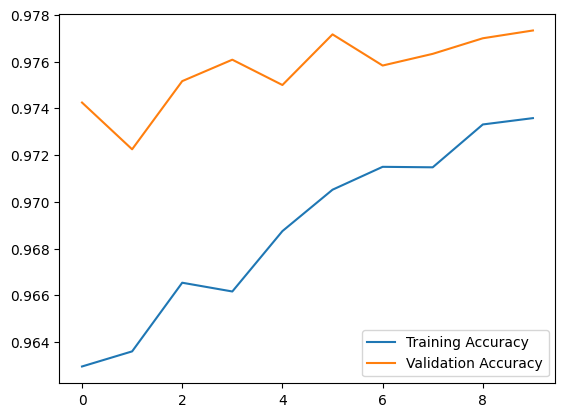

In [77]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

### Evaluating the model

In [78]:
# Evaluate on test data
test_loss, test_acc = best_model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9750 - loss: 0.1895
Test accuracy: 0.9779000282287598
